## Convolutional Neuaral Networks : Step  by Step

Here we implement convolutional (CONV) and pooling (POOL) layers in numpy, including  both forward propagation and backward proapagtion (which is optinal)


 Here $$ n_H, n_W and n_C$$ denote the height , width and number of channels of a given layer.

In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# %load_ext autoreload
# %autoreload 2

np.random.seed(1)

We will be implementing the building blocks of a convolutional neural network! Each function you will implement will have detailed instructions that will walk you through the steps needed:

* Convolution functions, including:
 * Zero padding
 * Convolve window
 * Convolution forward
 * Convolution backward

* Pooling functions , including
 *Pooling forward
 * Create mask
 * Distribute value
 * Pooling backward (optional)  

## Convolutional Neural Networks

Although programming frameworks make convolutions easy to use, they remain one of the hardest concepts to understand in Deep Learning. A convolution layer transforms an input volume into an output volume of different size,

### Zeor padding
Adds zeros around the border of the image 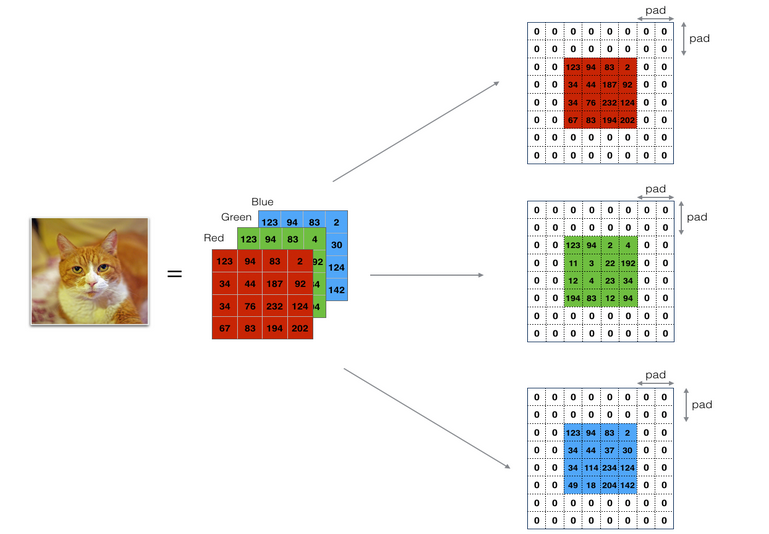

It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer.
* It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.


In [36]:
# def zero_pad(X, pad):
#   """ Pad with zeros all images of the dataset X. The padding is applied to the height and
#   width of the image as shown in the above figure.

#   Argument:

#   X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch on m images
#   pad -- integer , amout of padding around each image on vertical and horizontal dimensions

#   Returns
#   X_pad -- padded image of the shape (m, n_H, + 2 * pad, n_W + 2 * pad, n_C)

#   """
#   X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)


#   return X-pad



In [45]:
def zero_pad(X, pad):
    X_pad = np.pad(
        X,
        ((0, 0),
         (pad, pad),
         (pad, pad),
         (0, 0)),
        mode='constant',
        constant_values=0
    )
    return X_pad


x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 3, 3, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[-1.09914405 -2.68372786]
 [-2.12289023 -2.93576943]
 [-2.26788808 -1.46964453]]


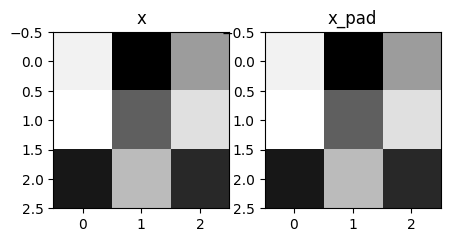

In [8]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

## Single step of convolution

Here we implement a single step of convolution , in which we apply the filter to a single position of the input. this will be used to build a convolution unit which:
   * Takes an input volume
   * Applies a filter at every position of the input
   * Outputs another volume (usually of different size)


In a computer vision application, each value in the matrix on the left corresponds to a single pixel value, and we convolve a 3x3 filter with the image by multiplying its values element-wise with the original matrix, then summing them up and adding a bias
Here we implementa single step of the convolution , corresponding to applying a filter to just one of the positions to get a single real-valued output .


Later we implement or apply this fun: to multiple positions of the input to implement the full convolution operation.



In [9]:
def conv_single_step(a_slice_prev, W, b):
  """ Apply one filter defined by parameters W on a single slice  (a__slice_prev) of the output
  activation of the previous layer.
  Arguments:
  a_slice_prev -- slice of input data od shape (f, f, n_C_prev)
  W -- weight parameters contained in a window - matrix of shape (1, 1, 1)

  Returns:
  Z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data

  """
  s = np.multiply(a_slice_prev, W)
  Z = np.sum(s)

  Z = Z  + float(b)

  return Z





In [32]:
np.random.seed(1)

a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)


Z = conv_single_step(a_slice_prev, W, b)
print("Z = ", Z)

Z =  -6.999089450680221


/tmp/ipython-input-4292854231.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = Z  + float(b)


## Convolutional Neural Networks - Forward pass
In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:

here we **Implement the function below to convolve the filters W on an input activation A_prev. This function takes as input A_prev, the activations output by the previous layer (for a batch of m inputs), F filters/weights denoted by W, and a bias vector denoted by b, where each filter has its own (single) bias. Finally you also have access to the hyperparameters dictionary which contains the stride and the padding.**





A_prev shape: (10, 4, 4, 3)


NameError: name 'A_prev_pad' is not defined

In [47]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function

    Arguments:
    A_prev -- output activations of the previous layer,
              numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dict containing "stride" and "pad"

    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for conv_backward()
    """

    # Retrieve dimensions
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, _, _, n_C) = W.shape

    # Hyperparameters
    stride = int(hparameters['stride'])
    pad = int(hparameters['pad'])

    # Output dimensions
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1

    # Initialize output
    Z = np.zeros((m, n_H, n_W, n_C))

    # Pad input
    A_prev_pad = zero_pad(A_prev, pad)

    for i in range(m):
        a_prev_pad = A_prev_pad[i]

        for h in range(n_H):
            vert_start = h * stride
            vert_end = vert_start + f

            for w in range(n_W):
                horiz_start = w * stride
                horiz_end = horiz_start + f

                for c in range(n_C):
                    a_slice_prev = a_prev_pad[
                        vert_start:vert_end,
                        horiz_start:horiz_end,
                        :
                    ]

                    Z[i, h, w, c] = conv_single_step(
                        a_slice_prev,
                        W[..., c],
                        b[..., c]
                    )

    assert Z.shape == (m, n_H, n_W, n_C)

    cache = (A_prev, W, b, hparameters)

    return Z, cache


In [48]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])


Z's mean = 0.048995203528855794
Z[3,2,1] = [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


/tmp/ipython-input-4292854231.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = Z  + float(b)


## Pooling Layer
The pooling (POOL) layer reduces the height and width of the input. It helps reduce computation, as well as helps make feature detectors more invariant to its position in the input. The two types of pooling layers are:

* Max poolinglayer: slides an (f, f) window over the input and store the max value of the window in the outupt
* Average  pooling layer : slides an (f, f) window over the input and store the average value of the window in the output


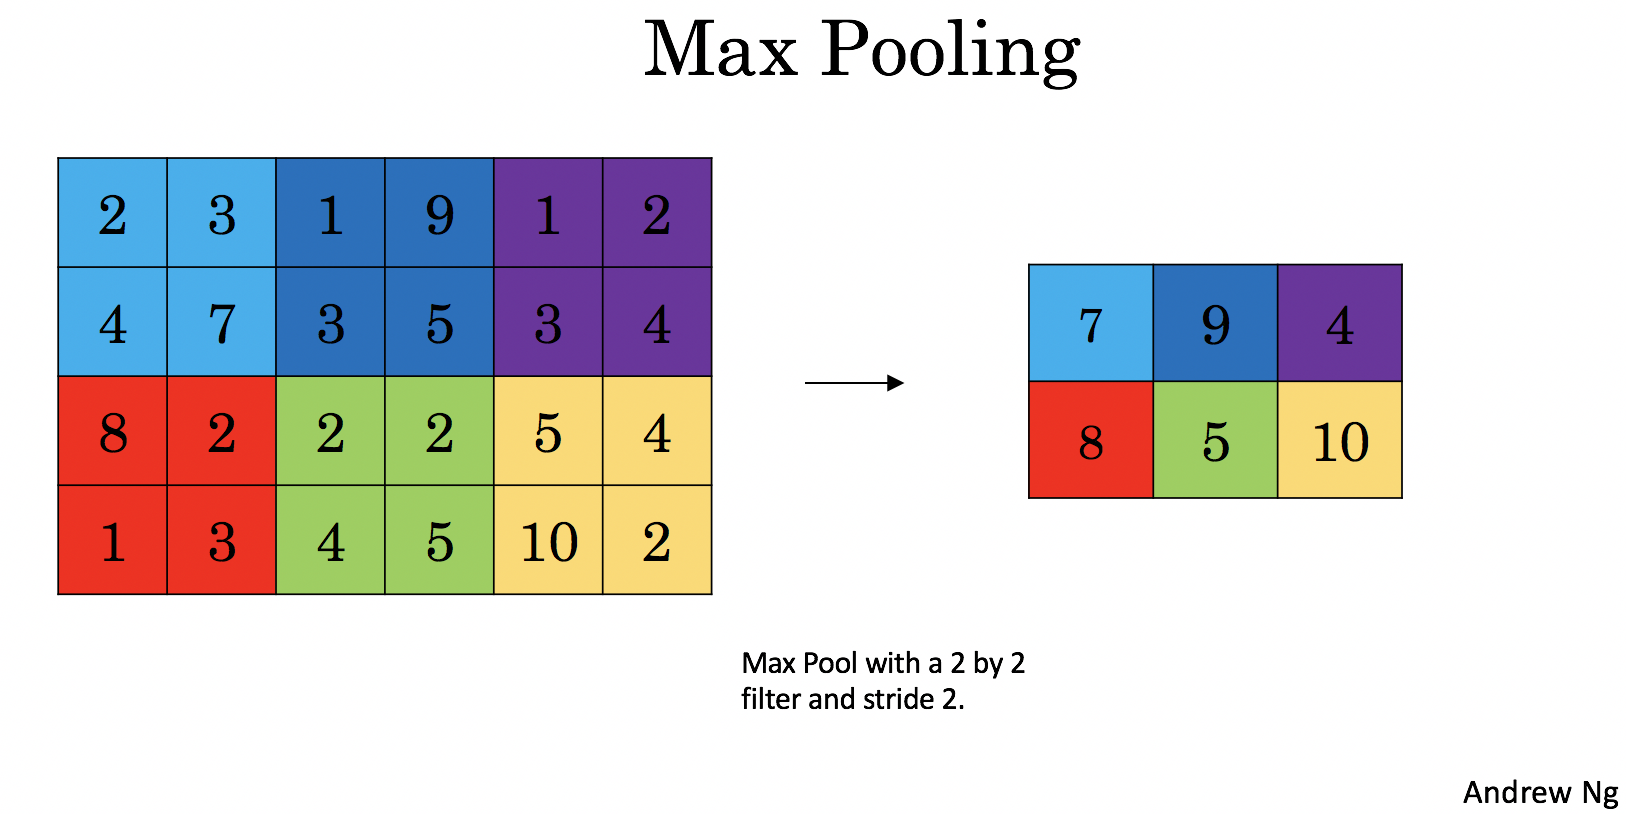

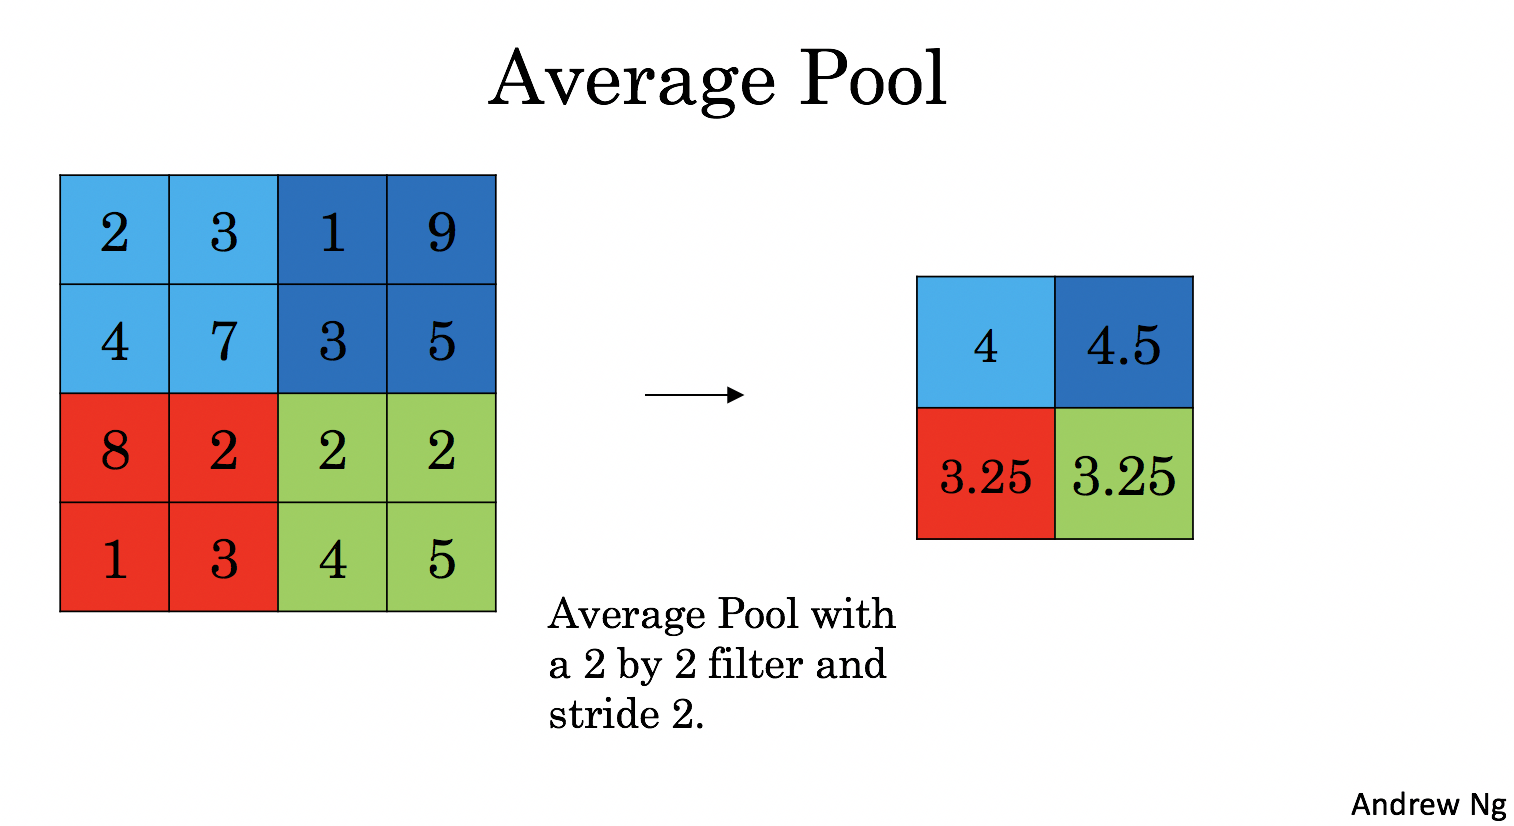

## Forward pooling
Now we implement MAX_POOL and AVG_POOL in the same function


In [53]:
# pool_forward

def pool_forward(A_prev, hparameters, mode="max"):
  """ Implements the forward pass of the pooling layer

  Arguemnts
  A_prev -- Input  data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
  h_parameters -- Python dictiinary containig "f" and "stride"
  mode -- the pooling mode you would like to use , defined as a string

  Returns --
  A -- output of the pool layer, a numpy array of shape(m, n_H, n_W, n_C)
  cache -- cache used in the backwar pass of the pooling layer, containing the input and hparameters
  """

  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
  f = hparameters["f"]
  stride = hparameters["stride"]

  n_H = int(np.floor((n_H_prev - f) / stride)) + 1
  n_W = int(np.floor((n_W_prev - f) / stride)) + 1
  n_C = n_C_prev

  A = np.zeros((m, n_H, n_W, n_C))

  for i in range(m):
      for h in range(n_H):
          for w in range(n_W):
              for c in range(n_C):
                  vert_start = h * stride
                  vert_end = vert_start + f
                  horiz_start = w * stride
                  horiz_end = horiz_start + f

                  a_prev_slice = A_prev[
                      i,
                      vert_start:vert_end,
                      horiz_start:horiz_end,
                      c
                  ]

                  if mode == "max":
                      A[i, h, w, c] = np.max(a_prev_slice)
                  elif mode == "average":
                      A[i, h, w, c] = np.mean(a_prev_slice)
                  else:
                      raise ValueError("mode must be 'max' or 'average'")

  cache = (A_prev, hparameters)
  assert A.shape == (m, n_H, n_W, n_C)

  return A, cache








In [54]:
np.random.seed(1)

A_prev = np.random.randn(2, 4, 4, 3)

hparameters = {"stride": 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)

print("mode = max")
print("A = ", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")

print("mode = average")

print("A = ", A)

mode = max
A =  [[[[1.74481176 0.86540763 1.13376944]]]


 [[[1.13162939 1.51981682 2.18557541]]]]

mode = average
A =  [[[[ 0.02105773 -0.20328806 -0.40389855]]]


 [[[-0.22154621  0.51716526  0.48155844]]]]


## Conv layer backward pass

###Computing dA
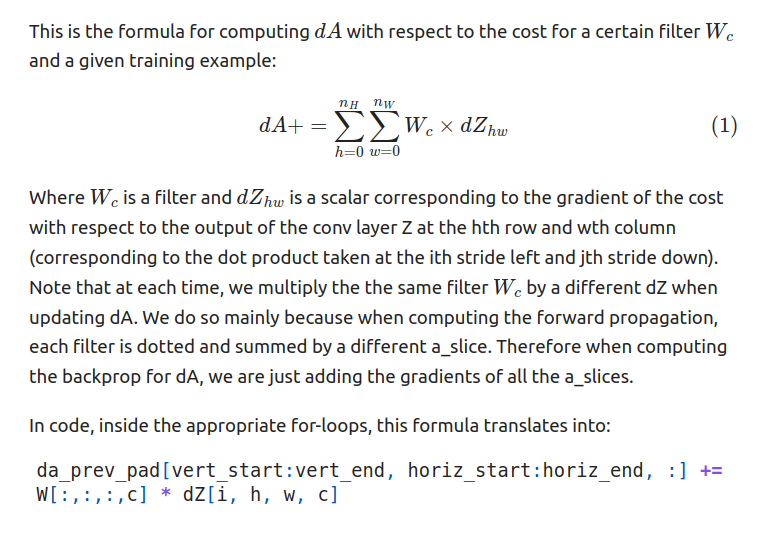

### COmputing dW:
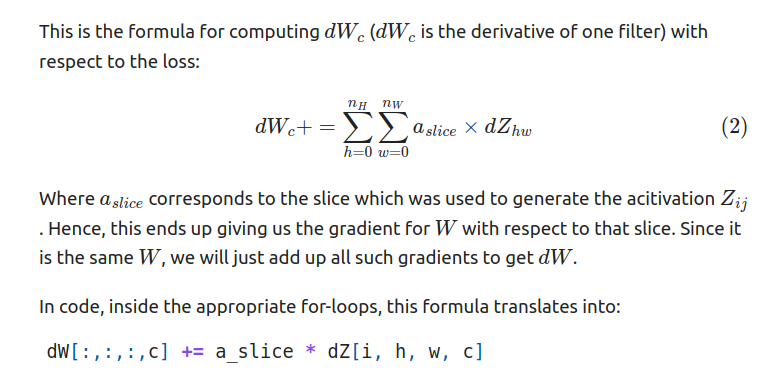

### Computing db:

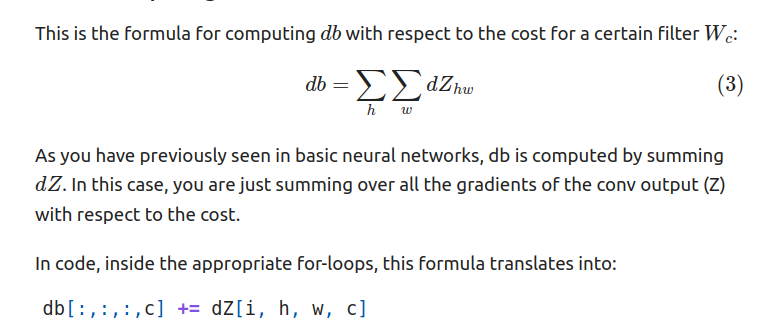

In [55]:
def conv_backward(dZ, cache):

  """ IMplement the backward propgation for a convolution function
  Arguments

  dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
  cache -- cache of values needed for the conv_backward(), output of conv_forward()

  Returns:
  dA_prev : gradient of the cost with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
  dW -- : gradient of the cost with respect to the weights of the conv layer (W)
          numpy array of shape (f, f, n_C_prev, n_C)
   db: -- : gradient of the cost with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)

  """

  (A_prev, W, b, hparameters) = cache

  # Retrieve dimensions from A_prev's shape
  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

  # Retrieve the dimension from W's shape
  (f, f, n_C_prev, n_C) = W.shape

  # Retrieve the information from "hparameters"
  stride = hparameters['stride']
  pad = hparameters['pad']

  # Retrieve dimensions from dZ's shape
  (m, n_H, n_W, n_C) = dZ.shape

  # Iniitialize dA_prev, dW, db with the correct shapes
  dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))
  dW = np.zeros((f, f, n_C_prev, n_C))
  db = np.zeros((1, 1, 1, n_C))

  # Pad the A_prev and dA_prev
  A_prev_pad = zero_pad(A_prev, pad)
  dA_prev_pad = zero_pad(dA_prev, pad)


  for i in range(m):

      a_prev_pad = A_prev_pad[i]
      da_prev_pad = dA_prev_pad[i]

      for h in range(n_H):
        for w in range(n_W):
          for c in range(n_C):

            vert_start = h
            vert_end = vert_start + f
            horiz_start = w
            horiz_end = horiz_start + f

            # Use the corners to define the slice from a_prev_pad
            a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

            # Update the gradients for the window and the filters parameter using the code formula from the above
            da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:, :, :, c] * dZ[i, h, w, c]
            dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
            db[:, :, :, c] += dZ[i, h, w, c]

      # Set the ith training example's dA_prev to the unpaded da_prev_pad (Hint: use X[pad:-pad, pad:-pad, :])
      dA_prev[i, :, :, :]  = da_prev_pad[pad: -pad, pad:-pad, :]
  assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
  return dA_prev, dW,  db







In [56]:
np.random.seed(1)
dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))

print("db_mean =", np.mean(db))

dA_mean = 0.6347704472654743
dW_mean = 1.5572657428497354
db_mean = 7.839232564616838


## Pooling layer backward pass

Next, let's implement the backward pass for the pooling layer, starting with the MAX-POOL layer. Even though a pooling layer has no parameters for backprop to update, you still need to backpropagation the gradient through the pooling layer in order to compute gradients for layers that came before the pooling layer.


## Max pooling - backward pass

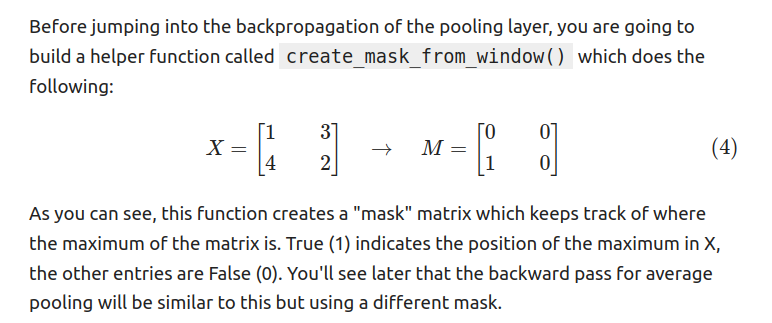

In [57]:
def create_mask_from_window(x):
  mask = x == np.max(x)

  return mask

In [58]:
np.random.seed(1)
x = np.random.randn(2, 3)
mask = create_mask_from_window(x)
print("x = ", x)
print("mask = ", mask)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


### Average Pooling - backwrad pass
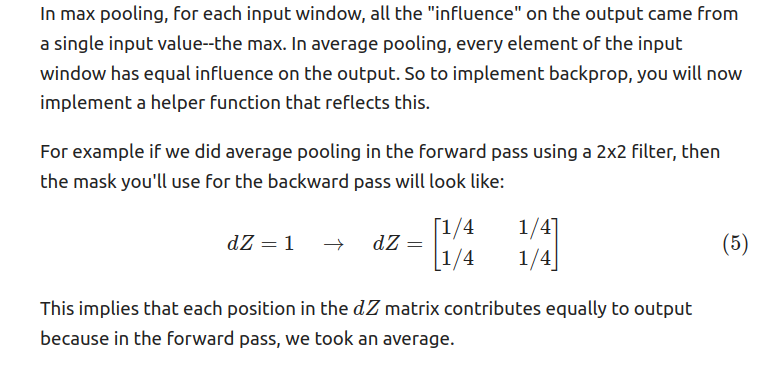

In [61]:
def distribute_values(dz, shape):
  (n_H, n_W) = shape

  average = dz / (n_H * n_W)

  a = np.ones(shape) * average

  return a


In [62]:
a = distribute_values(2, (2, 2 ))
print("distributed value = ", a)

distributed value =  [[0.5 0.5]
 [0.5 0.5]]


## Putting it alltogether


In [63]:
def pool_backward(dA, cache, mode="max"):

  (A_prev, hparameters) = cache

  stride = hparameters['stride']
  f = hparameters['f']

  m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
  m, n_H, n_W, n_C = dA.shape

  dA_prev = np.zeros(A_prev.shape)

  for i in range(m):
    # select training example from A_prev ~1 line
    a_prev = A_prev[i]
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          vert_start = h
          vert_end = vert_start + f
          horiz_start = w
          horiz_end = horiz_start + f

          # Compute backwward propagation in both mode
          if mode == "max":
            # Use the corners and "c" to define the current slice from a_prev (≈1 line)
            a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
            # Create the mask from a_prev_slice (~1 line)
            mask = create_mask_from_window(a_prev_slice)
            # Set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA) (≈1 line)
            dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += np.multiply(mask, dA[i, h, w, c])

          elif mode == "average":
              # Get the value a from dA (≈1 line)
              da = dA[i, h, w, c]
              # define the shape of the filter as fxf (~1 line)
              shape = (f, f )
              # Distribute it to get the correct slice of dA_prev. i.e. Add the distributed value of da. (≈1 line)
              dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += distribute_values(da, shape)


  assert(dA_prev.shape == A_prev.shape)
  return dA_prev





















In [64]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride": 1, "f":2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode="max")
print("mode = max")
print("mean of dA ", np.mean(dA))
print("dA_prev[1, 1 ] = ", dA_prev[1, 1])
print()

dA_prev = pool_backward(dA, cache, mode="average")
print("mode = average")
print("mean of dA = ", np.mean(dA))
print("dA_prev[1, 1] = ", dA_prev[1, 1])

mode = max
mean of dA  0.14571390272918056
dA_prev[1, 1 ] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev[1, 1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]
